# Intro to Seismology: Programming for Homework 1
## Name: 

In [1]:
# import necessary modules
from numpy import sqrt
from pandas import read_csv
import os
import matplotlib.pyplot as plt
%matplotlib inline

# Question 1:

From the homework you expressed the Lame parameters in terms of the compressional velocity, $\alpha$, 
shear velocity, $\beta$, and density, $\rho$ so that the shear modulus is given by
$$
   \mu = \rho \beta^2
$$
and the $\lambda$ Lame parameter is given by 
$$  
  \lambda = \rho (\alpha^2 - 2 \beta^2)
$$

Complete the following function which takes as input the $\alpha$, $\beta$, and $\rho$ and returns $\lambda$ and $\mu$.  The necessary calculations can be performed in two lines of code.

In [2]:
def convert_vpVsDensity_to_lambdaMu(vp, vs, rho):
    """
    Computes the Lame parameters, lambda and mu, from the compressional 
    velocity, shear velocity, and density.
    
    Parameters
    ----------
    vp : array_like
        The compressional velocity in m/s.
    vs : array_like
        The shear velocity in m/s.
    rho : array_like
        The density in kg/m^3.
        
    Returns
    -------
    lam : array_like
       The lambda Lame parameter in Pa.
    mu : array_like
       The shear modulus Lame parameter in Pa.
    """
    mu =  # Put your code here
    lam = # Put your code here
    return lam, mu

## Unit Tests

As you become a better, and busier, programmer you will want to reuse your functions.  Unit (regression) tests are an excellent way to verify that your code is correct despite modifications by yourself or others.  In fact, automated test frameworks can run your unit tests for you and verify the correctness of large software packages.  These utilities are especially important when working in teams on a project.

To test your function run the following unit test.  The unit test simply verifies that you have correctly implemented the inverse operation to Shearer's Equations 2.34 and 2.35.  Hence, you should be able to go back and forth seamlessly down to numerical precision.  If the following code throws an error then there is a mistake in your code.  

Pro tip: Scientific code can evolve rapidly therefore bugs can quickly be introduced.  Unit tests are a great way to ensure code correctness.

In [3]:
# This is a unit test to verify that your code works
def unit_test():
    mu  = 2.*10**9
    lam = 1.5*10**9
    rho = 2700
    vp = sqrt((lam + 2*mu)/rho) # Shearer Eqn. 2.34
    vs = sqrt(mu/rho)           # Shearer Eqn. 2.35
    lam_test, mu_test = convert_vpVsDensity_to_lambdaMu(vp, vs, rho)
    # Test that your function recovers the expect mu and lambda.  Note, however
    # a strict equality is a bad idea.  Instead, realize that double precision
    # arithmetic, the Python default, will yield 15-16 digits of accuracy.  Thus,
    # we ensure that we recover the desired result to this level of precision.
    assert(abs(lam_test - lam)/abs(lam) < 1.e-15), "Failed lamda test"
    #    print(lam_test - lam)
    assert(abs(mu_test - mu)/abs(mu) < 1.e-15), "Failed mu test"
    #    print(mu_test - mu)
    return True

if (unit_test()):
    print("Passed unit test!")

Passed unit test!


# PREM

Next, test your function the Preliminary Earth Reference Model which is a 1D global earth model parameterized as a function of concentric shells.  Each shell has a given radius, density, and velocity.  


In [4]:
# Load PREM
datadir = "."
prem = read_csv(os.path.join(datadir, 'PREM500.csv')) # You may have put this in a different data directory
radius = prem['radius'].values # radius in meters
rho = prem['density'].values # density in kg/m**3
vp = prem['Vpv'].values # compressional velocity in meters/second
vs = prem['Vsv'].values # shear velocity in meters/second
dep = max(radius) - radius # convert radius to depth for ease in plotting

# Question 2: 

From the PREM $V_p$, $V_s$, and $\rho$ material properties use the function above to compute the $\lambda$ and $\mu$ Lame parameters.

Then convert $\lambda$ and $\mu$ from Pa to GPa and depth from meters to kilometers.

In [5]:
# Compute lambda and mu
[lam, mu] = convert_vpVsDensity_to_lambdaMu( )# Put your code here by finishing the function call
lam_gpa = # put your code here
mu_gpa  = # put your code here
dep_km  = # put your code here

# Plot the Result  

Note that in seismology for vertical 1D profiles we typically put the independent variable, depth, on a reversed $y$ axis.

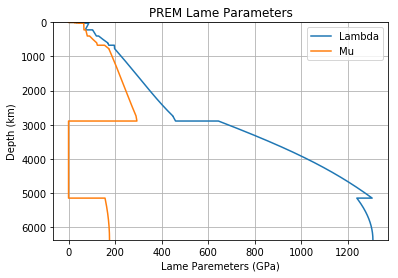

In [6]:
plt.plot(lam_gpa, dep_km, label='Lambda')
plt.plot(mu_gpa, dep_km, label='Mu')
plt.ylim(max(dep_km), 0)
plt.xlabel('Lame Paremeters (GPa)')
plt.ylabel('Depth (km)')
plt.title("PREM Lame Parameters")
plt.legend()
plt.grid(True)
plt.show()

## Question 3: 

### Part A: What is the resistance to shear at $4000$ km depth?  

Type your answer here.

### Part B: What is the corresponding shear velocity?

Type your answer here.

### Part C: Do compressional waves propagate in the outer core?

Type your answer here.

When you are done:

    1. Rename your notebook to myname_ess412_512_hw1_programming.
    2. Save and Checkpoint your notebook.
    3. Download your notebook as an HTML.
    4. Submit it to Canvas.